# Install

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=5cb4c031473e8e818c3a219bef1a92be0fb9309431fe4300763c1ec5afc4315a
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=e873e1cd780bfc5b8856ab0fd79a6533f7fc9e4c0c91ef5b67c4c3a087babbbb
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab79

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

a. U-Net Separate Channel Ki

In [ ]:
!python train_a.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_uniform_crop.h5 --name UNet_Ki --model pix2pix --direction AtoB --display_id -1 --input_nc 1 --output_nc 1 --load_size 256 --n_epochs 100 --n_epochs_decay 100 --netG 'unet_256' --gan_mode 'lsgan' --gpu_ids 0 --preprocess none --global_norm

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                data_type: _e                            
                 dataroot: /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_uniform_crop.h5	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          di

a. Download Pretrained Model

a. Testing

In [ ]:
!python test_b.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_test_crop.h5 --direction AtoB --model pix2pix --name UNet_Ki --input_nc 1 --output_nc 1 --load_size 256 --num_test 100 --global_norm --num_threads 0 --preprocess none

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                data_type: _e                            
                 dataroot: /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_test_crop.h5	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
              global_norm: True                          	[default: False]
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                       

a. Evaluaion


Average metrics for real_B_ and fake_B_ - Channel Ki:
RMSE: 0.00582
NMSE: 0.05515
NRMSE: 0.05427
SSIM: 0.84398
PSNR: 25.02119

Average metrics for real_B_ and real_A_ - Channel Ki:
RMSE: 0.01851
NMSE: 0.67309
NRMSE: 0.17398
SSIM: 0.53798
PSNR: 27.02144

Metrics for real_B_ and fake_B_ - Channel Ki:
RMSE: 0.00565
NMSE: 0.05670
NRMSE: 0.02039
SSIM: 0.93276
PSNR: 32.99961


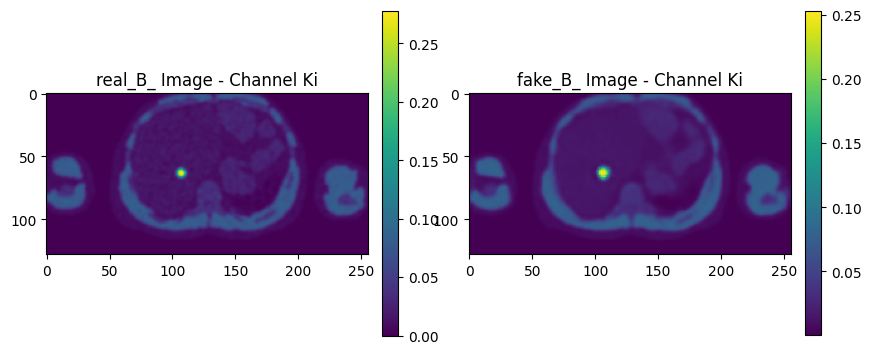


Metrics for real_B_ and real_A_ - Channel Ki:
RMSE: 0.00830
NMSE: 0.12228
NRMSE: 0.02994
SSIM: 0.88074
PSNR: 29.71321


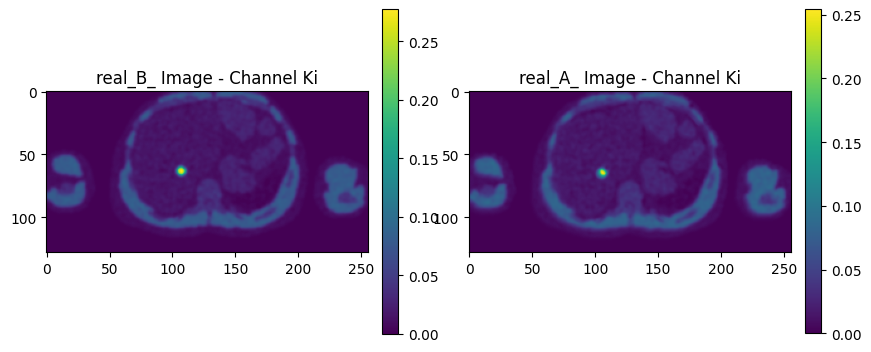

In [ ]:
from evaluation_metrics import EvaluationMetrics

# Initialize the class for only the "Ki" channel
eval_metrics = EvaluationMetrics("test_results_a", 100, [('real_B_', 'fake_B_'), ('real_B_', 'real_A_')], ["Ki"])

# Calculate average metrics
eval_metrics.calculate_average_metrics()

# Evaluate one pair
eval_metrics.evaluate_one_pair(('real_B_', 'fake_B_'), 80)
eval_metrics.evaluate_one_pair(('real_B_', 'real_A_'), 80)


a. Download Test Results

b.U-Net Separate Channel Vd

In [ ]:
!python train_b.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_uniform_crop.h5 --name UNet_Vd --model pix2pix --direction AtoB --display_id -1 --input_nc 1 --output_nc 1 --load_size 256 --n_epochs 100 --n_epochs_decay 100 --netG 'unet_256' --gan_mode 'lsgan' --gpu_ids 0 --preprocess none --global_norm

b. Download trained model

b. Testing

In [ ]:
!python test_b.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_test_crop.h5 --direction AtoB --model pix2pix --name UNet_Vd --input_nc 1 --output_nc 1 --load_size 256 --num_test 100 --global_norm --num_threads 0 --preprocess none

b. Evaluation

In [ ]:
from evaluation_metrics import EvaluationMetrics

# Initialize the class for only the "Vd" channel
eval_metrics = EvaluationMetrics("test_results_b", 100, [('real_B_', 'fake_B_'), ('real_B_', 'real_A_')], ["Vd"])

# Calculate average metrics
eval_metrics.calculate_average_metrics()

# Evaluate one pair
eval_metrics.evaluate_one_pair(('real_B_', 'fake_B_'), 80)
eval_metrics.evaluate_one_pair(('real_B_', 'real_A_'), 80)


b.Download Test Results

c. U-Net Two Channel

In [ ]:
!python train_c.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_uniform_crop.h5 --name UNet_Stacked --model pix2pix --direction AtoB --display_id -1 --input_nc 2 --output_nc 2 --load_size 256 --n_epochs 100 --n_epochs_decay 100 --netG 'unet_256' --gan_mode 'lsgan' --gpu_ids 0 --preprocess none --global_norm

c. Download Trained Model

c. Testing

In [ ]:
!python test_c.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_test_crop.h5 --direction AtoB --model pix2pix --name UNet_Stacked --input_nc 2 --output_nc 2 --load_size 256 --num_test 100 --global_norm --num_threads 0 --preprocess none

c.Evaluation

In [ ]:
from evaluation_metrics import EvaluationMetrics

# Initialize the class for only the "Ki and Vd" channel
eval_metrics = EvaluationMetrics("test_results_c", 100, [('real_B_', 'fake_B_'), ('real_B_', 'real_A_')], ["Ki", "Vd"])

# Calculate average metrics
eval_metrics.calculate_average_metrics()

# Evaluate one pair
eval_metrics.evaluate_one_pair(('real_B_', 'fake_B_'), 80)
eval_metrics.evaluate_one_pair(('real_B_', 'real_A_'), 80)


c.Download Test Results

d. pix2pix Separate Channel Ki

In [ ]:
!python train_d.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_uniform_crop.h5 --name pix2pix_Ki --model pix2pix --direction AtoB --display_id -1 --input_nc 1 --output_nc 1 --load_size 256 --n_epochs 100 --n_epochs_decay 100 --netG 'unet_256' --gan_mode 'lsgan' --gpu_ids 0 --global_norm

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                data_type: _e                            
                 dataroot: /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_uniform_crop.h5	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          di

d. download trained model

d. Testing

In [ ]:
!python test_d.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_test_crop.h5 --direction AtoB --model pix2pix --name pix2pix_Ki --input_nc 1 --output_nc 1 --load_size 256 --num_test 100 --global_norm --num_threads 0 --preprocess none

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                data_type: _e                            
                 dataroot: /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_test_crop.h5	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
              global_norm: True                          	[default: False]
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                       

d. Evaluation


Average metrics for real_B_ and fake_B_ - Channel Ki:
RMSE: 0.00547
NMSE: 0.05022
NRMSE: 0.05126
SSIM: 0.84679
PSNR: 27.31475

Average metrics for real_B_ and fake_B_ - Channel Vd:
RMSE: 0.09188
NMSE: 0.13364
NRMSE: 0.07571
SSIM: 0.66677
PSNR: 22.18740

Average metrics for real_B_ and real_A_ - Channel Ki:
RMSE: 0.01851
NMSE: 0.67309
NRMSE: 0.17398
SSIM: 0.53798
PSNR: 24.73956

Average metrics for real_B_ and real_A_ - Channel Vd:
RMSE: 0.33440
NMSE: 2.41327
NRMSE: 0.27527
SSIM: 0.62721
PSNR: 29.18614

Metrics for real_B_ and fake_B_ - Channel Ki:
RMSE: 0.00505
NMSE: 0.04532
NRMSE: 0.01823
SSIM: 0.95894
PSNR: 38.02725

Metrics for real_B_ and fake_B_ - Channel Vd:
RMSE: 0.08329
NMSE: 0.06010
NRMSE: 0.05627
SSIM: 0.76947
PSNR: 23.77064


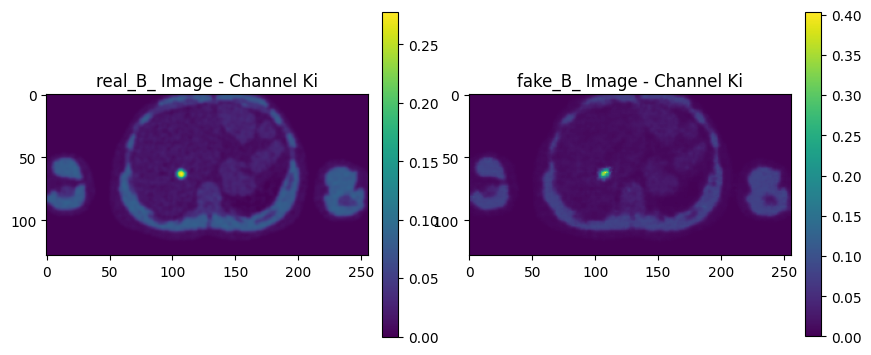

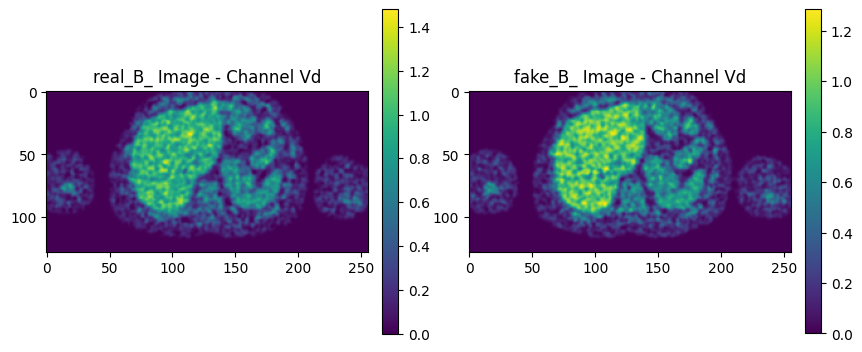


Metrics for real_B_ and real_A_ - Channel Ki:
RMSE: 0.00830
NMSE: 0.12228
NRMSE: 0.02994
SSIM: 0.88074
PSNR: 29.71321

Metrics for real_B_ and real_A_ - Channel Vd:
RMSE: 0.23589
NMSE: 0.48210
NRMSE: 0.15937
SSIM: 0.80378
PSNR: 29.26761


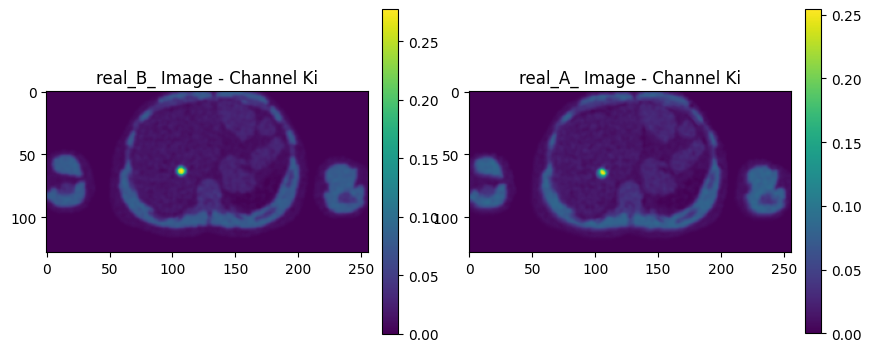

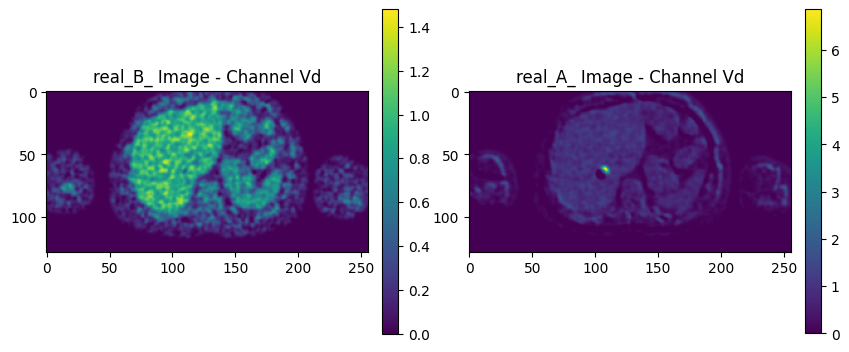

In [ ]:
from evaluation_metrics import EvaluationMetrics

# Initialize the class
eval_metrics = EvaluationMetrics("test_results_d", 100, [('real_B_', 'fake_B_'), ('real_B_', 'real_A_')], ["Ki"])

# Calculate average metrics
eval_metrics.calculate_average_metrics()

# Evaluate one pair
eval_metrics.evaluate_one_pair(('real_B_', 'fake_B_'), 80)
eval_metrics.evaluate_one_pair(('real_B_', 'real_A_'), 80)


d. Download Test Result

e. Pix2Pix Separate Channel Vd

In [ ]:
!python train_e.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_uniform_crop.h5 --name pix2pix_Vd --model pix2pix --direction AtoB --display_id -1 --input_nc 1 --output_nc 1 --load_size 256 --n_epochs 100 --n_epochs_decay 100 --netG 'unet_256' --gan_mode 'lsgan' --gpu_ids 0 --global_norm

e.Download Trained Model

e.Testing

In [ ]:
!python test_e.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_test_crop.h5 --direction AtoB --model pix2pix --name pix2pix_Vd --input_nc 1 --output_nc 1 --load_size 256 --num_test 100 --global_norm --num_threads 0 --preprocess none

e.Evaluation

In [ ]:
from evaluation_metrics import EvaluationMetrics

# Initialize the class
eval_metrics = EvaluationMetrics("test_results_e", 100, [('real_B_', 'fake_B_'), ('real_B_', 'real_A_')], ["Vd"])

# Calculate average metrics
eval_metrics.calculate_average_metrics()

# Evaluate one pair
eval_metrics.evaluate_one_pair(('real_B_', 'fake_B_'), 80)
eval_metrics.evaluate_one_pair(('real_B_', 'real_A_'), 80)


e.Download Test Results

f.Pix2Pix Two Channel

In [ ]:
!python train_f.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_uniform_crop.h5 --name pix2pix_Ki --model pix2pix --direction AtoB --display_id -1 --input_nc 2 --output_nc 2 --load_size 256 --n_epochs 100 --n_epochs_decay 100 --netG 'unet_256' --gan_mode 'lsgan' --gpu_ids 0 --global_norm

f.Download Trained Model

f.Testing

In [ ]:
!python test_f.py --data_type _e --dataroot /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/dataset_e_test_crop.h5 --direction AtoB --model pix2pix --name pix2pix_Stacked --input_nc 2 --output_nc 2 --load_size 256 --num_test 100 --global_norm --num_threads 0 --preprocess none

f.Evaluation

In [ ]:
from evaluation_metrics import EvaluationMetrics

# Initialize the class
eval_metrics = EvaluationMetrics("test_results_f", 100, [('real_B_', 'fake_B_'), ('real_B_', 'real_A_')], ["Ki", "Vd"])

# Calculate average metrics
eval_metrics.calculate_average_metrics()

# Evaluate one pair
eval_metrics.evaluate_one_pair(('real_B_', 'fake_B_'), 80)
eval_metrics.evaluate_one_pair(('real_B_', 'real_A_'), 80)


f.Download Test Results